<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="image" href="/hera/icons/footer/ocasionplus.svg" rel="preload"/>
  <link as="image" href="/hera/icons/footer/facebook.svg" rel="preload"/>
  <link as="image" href="/hera/icons/footer/instagram.svg" rel="preload"/>
  <link as="image" href="/hera/icons/footer/x.svg" rel="preload"/>
  <link as="image" href="/hera/icons/footer/youtube.svg" rel="preload"/>
  <link as="image" href="/hera/icons/footer/tiktok.svg" rel="preload"/>
  <link as="image" href="/hera/icons/home.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/car.svg" rel="preload"/>
  <link as="image" href="/hera/icons/f
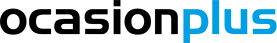

In [5]:
# scrape_coches_ocasion




#Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

#Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
#Realizará una solicitud HTTP GET a la siguiente url.
url = "https://www.ocasionplus.com/coches-ocasion?v2&orderBy=morePopular"
llamada = requests.get(url)

#Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.
codigo = llamada.status_code
if codigo != 200:
    print (f"Error en la llamada, código de error {codigo}.")
    #acá irá un return "none"

sopa = BeautifulSoup (llamada.content, "html.parser")
print (sopa.prettify())


In [12]:
# obtener nombres
lista_nombre = sopa.find_all("span", {"class":"cardVehicle_spot__e6YZx"})
print(lista_nombre)

lista_nombre_texto = []
for nombre in lista_nombre:
    lista_nombre_texto.append(nombre.text) 

print (f"\nel elemento lista_nombre_texto es: {type(lista_nombre_texto)} con longitud: {len(lista_nombre_texto)}")
print (lista_nombre_texto)


[<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Opel Crossland X</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-price">14.750€</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Toyota Yaris</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-price">15.990€</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">KIA Niro</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-price">25.900€</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mazda CX-30</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-price">25.700€</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mazda CX-5</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-price">31.200€</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Subaru Forester</span>, <span class="cardVehicle_spot__e6YZx" data-test="span-price">25.200€</span>, <span cla

['Opel Crossland X',
 '14.750€',
 'Toyota Yaris',
 '15.990€',
 'KIA Niro',
 '25.900€',
 'Mazda CX-30',
 '25.700€',
 'Mazda CX-5',
 '31.200€',
 'Subaru Forester',
 '25.200€',
 'Mini COUNTRYMAN',
 '40.900€',
 'Hyundai Tucson',
 '18.450€',
 'Seat León',
 '16.490€',
 'Dacia Sandero',
 '17.590€',
 'Cupra Formentor',
 '36.500€',
 'Seat León',
 'Citroën Berlingo',
 '19.990€',
 'BMW Serie 1',
 'Toyota C-HR',
 '25.450€',
 'Ford EcoSport',
 '15.450€',
 'Ford Focus',
 '16.450€',
 'Hyundai i30',
 '16.900€',
 'Audi A1',
 '16.850€',
 'Mercedes Clase C',
 '34.500€']

In [21]:
# obtener precio rebajado

lista_precio_r = sopa.find_all("span", {"class":"cardVehicle_finance__SG6JV"})
print (lista_precio_r)

lista_precio_r_texto = []
for item in lista_precio_r:
    lista_precio_r_texto.append(item.text) 

print (f"\nel elemento lista_precio_r_texto es: {type(lista_precio_r_texto)} con longitud: {len(lista_precio_r_texto)}")
print (lista_precio_r_texto)


[<span class="cardVehicle_finance__SG6JV" data-test="span-version">1.2 Innovation (130 CV)</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-finance">13.409€</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-version">1.5 100H Active Tech (100 CV) Auto</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-finance">14.536€</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-version">1.6 GDi HEV Concept (141CV)</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-finance">23.545€</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-version">2.0 e-Skyactive-X Evolution 2WD (186 CV)</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-finance">23.363€</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-version">2.0 GE Origin 2WD Auto (165 CV) Auto</span>, <span class="cardVehicle_finance__SG6JV" data-test="span-finance">28.363€</span>, <span class="cardVehicle_finance__SG6JV" data-test="sp